# Lab 4 tutorial

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## A simple function for plotting data

In [2]:
def plot_data(x_in, y_in, color_in, label_in):
    plt.plot(x_in, y_in, 'o', color=color_in, label=label_in)
    plt.legend()

In [3]:
# generate some random data to plot
npts_test = 30
x_test = np.linspace(0,1,num=npts_test)
y_test = np.random.random(npts_test)

This function makes it easy to test out different options in the plot without having to repeat the plotting commands over and over again. It **encapsulates** the plotting code in the function!

You can make it fancier by including options to change the marker style, making the x and y legends, changing the font size, etc.

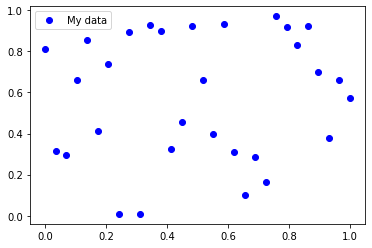

In [4]:
plot_data(x_test, y_test, 'blue', 'My data')

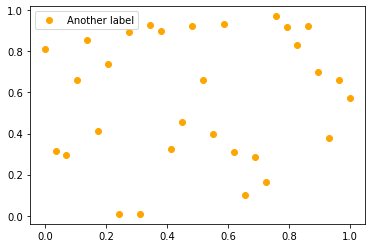

In [5]:
plot_data(x_test, y_test, 'orange', 'Another label')

## Using a function to fit data by eye

In [6]:
contents = np.load('lab1_file1.npz')

In [7]:
xvals_eye = contents['xvals']
data_eye = contents['data']

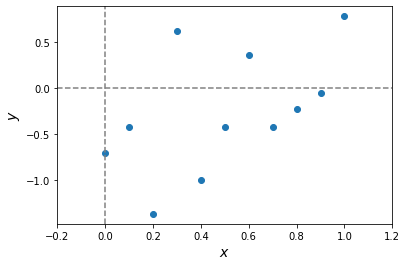

In [8]:
plt.plot(xvals_eye, data_eye,'o');
plt.xlabel(r'$x$', fontsize=14);
plt.ylabel(r'$y$', fontsize=14);
plt.xlim([-0.2, 1.2]);
# plot x and y axes to see more easily
plt.axhline(0,linestyle='--',color='grey');
plt.axvline(0,linestyle='--',color='grey');

### Create the function that does the fitting and makes a plot

In [9]:
def visual_fit_linear(x_in, data_in, m_in, b_in, xpred):
    # get some information from stuff passed in
    nd = len(x_in) # get number of data points
    npred = len(xpred) # get length of array to use for x predictions
    ypred = np.empty(npred)
    
    # make predictions
    for i in range(0, npred):
        ypred[i] = m_in * xpred[i] + b_in
        
    # create a label for the slope and intercept
    # uses string formatting for the numbers
    # the :.2f means floating point number, round to 2 decimal places
    ypred_label = '$m = ' + '{:.2f}'.format(m_in) \
                + '$, $ b = ' +  '{:.2f}'.format(b_in) + '$'
    
    # make plot of predictions with data
    plt.plot(x_in, data_in,'o');
    plt.plot(xpred, ypred, '+', color='orange', label=ypred_label)
    plt.xlabel(r'$x$', fontsize=14);
    plt.ylabel(r'$y$', fontsize=14);
    # plot x and y axes to see more easily
    plt.axhline(0,linestyle='--',color='grey');
    plt.axvline(0,linestyle='--',color='grey');
    plt.legend(fontsize=12)

In [10]:
x_predict = np.linspace(-0.2, 1.5, num=50)

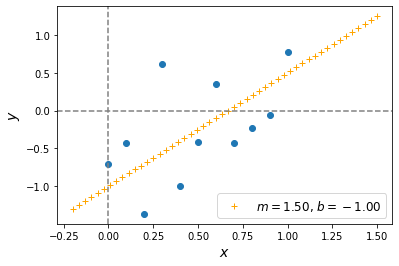

In [11]:
visual_fit_linear(xvals_eye, data_eye, 1.5, -1, x_predict)

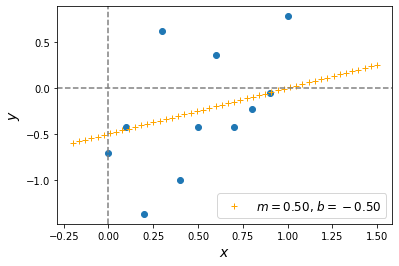

In [12]:
visual_fit_linear(xvals_eye, data_eye, 0.5, -0.5, x_predict)

## Semi-log transformation

If we have $y = C e^{kx}$, take log of both sides so you have

$$ \ln y = kx + \ln C $$

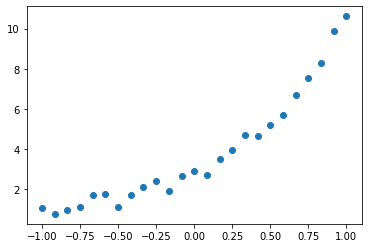

In [3]:
# generate some random exponential data
npts_exp = 25
x_exp = np.linspace(-1,1,num=npts_exp)
exp_k_val = 1.5
exp_C_val = 2.3
exp_data = np.empty(npts_exp)
for i in range(0,npts_exp):
    exp_data[i] = exp_C_val * np.exp(exp_k_val * x_exp[i]) + 0.9 * np.random.random()
plt.plot(x_exp, exp_data, 'o');
np.savez('lab4_file1.npz', xvals=x_exp, data=exp_data)

In [21]:
contents_exp = np.load('lab4_file1.npz')

In [23]:
contents_exp.files

['xvals', 'data']

In [30]:
x_exp = contents_exp['xvals']
data_exp = contents_exp['data']
npts_exp = len(x_exp) # extract number of data points

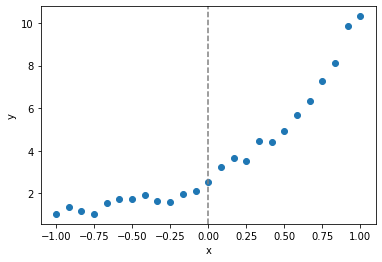

In [31]:
plt.plot(x_exp, data_exp, 'o');
plt.xlabel('x');
plt.ylabel('y');
plt.axvline(0,linestyle='--',color='gray');

Data look roughly exponential. Assume here we are using an exponential model for these data $y = C e^{kx}$

In [65]:
# make the logarithmic transformation
y_star_exp = np.empty(npts_exp)
for i in range(0, npts_exp):
    y_star_exp[i] = np.log(data_exp[i])

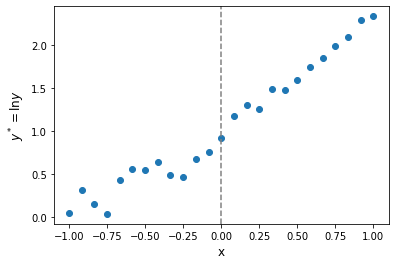

In [35]:
plt.plot(x_exp, y_star_exp, 'o');
plt.xlabel('x', fontsize=12);
plt.ylabel(r'$y^* = \ln y$', fontsize=12);
plt.axvline(0,linestyle='--',color='gray');

y intercept happens around 1 or maybe a little less than 1

Let's use the `visual_fit_linear` function developed above to find the slope and intercept

I will experiment with several different values here to see what works best (or the best thing I can find)

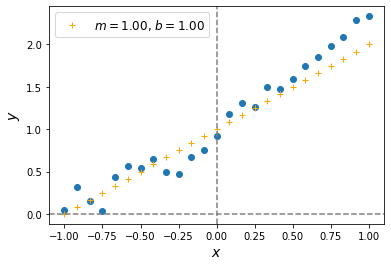

In [36]:
x_pred_exp = x_exp 
# don't really need more x points here 
# so just use the same x values as the data
visual_fit_linear(x_exp, y_star_exp, 1, 1, x_pred_exp)

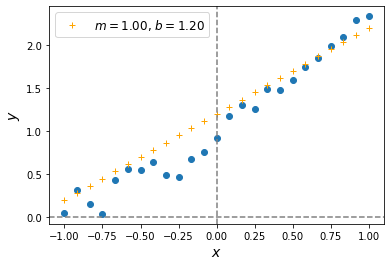

In [37]:
visual_fit_linear(x_exp, y_star_exp, 1, 1.2, x_pred_exp)

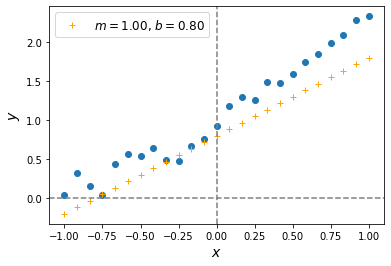

In [40]:
visual_fit_linear(x_exp, y_star_exp, 1, 0.8, x_pred_exp)

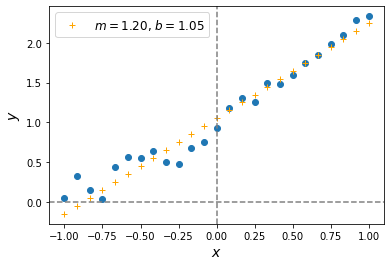

In [45]:
visual_fit_linear(x_exp, y_star_exp, 1.2, 1.05, x_pred_exp)

$m = 1.2$, $b=1.05$ look pretty good!

We have to translate that back to the original units though. The slope is just $k$ so we found $k = 1.2$. The intercept is $C^* = \ln C = 1.05$. That means that $C = e^{1.05)$ 

In [48]:
exp_C_val = np.exp(1.05)
print('C approximately', exp_C_val)
exp_k_val = 1.2

C approximately 2.857651118063164


Now make predictions in the original variables `\(x\)` and `\(y\)` and plot them that way

In [49]:
y_pred_exp = np.empty(npts_exp)
for i in range(0,npts_exp):
    y_pred_exp[i] = exp_C_val * np.exp(exp_k_val * x_pred_exp[i])

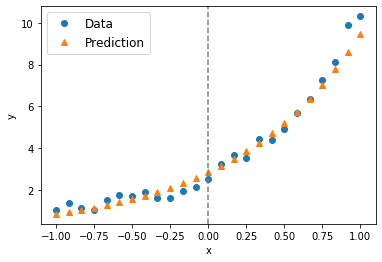

In [89]:
plt.plot(x_exp, data_exp, 'o', label='Data');
plt.plot(x_pred_exp, y_pred_exp, '^', label='Prediction');
plt.xlabel('x');
plt.ylabel('y');
plt.axvline(0,linestyle='--',color='gray');
plt.legend(fontsize=12);

Looks pretty good! We estimated $k\approx1.2$ and $C \approx 2.86$

Insider information: I generated these data with random noise using $C = 2.3$ and $k=1.5$

## Log-log transformation


If we have $y = C x^a$, take log of both sides so you have

$$ \ln y = a\ln x + \ln C $$

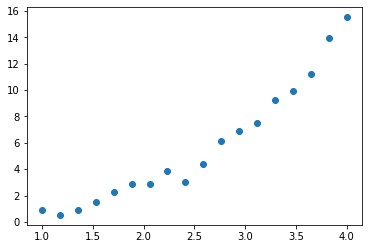

In [4]:
# generate some random power-law data
npts_pow = 18
x_pow = np.linspace(1,4,num=npts_pow)
pow_a_val = 3.1
pow_C_val = 0.2
pow_data = np.empty(npts_pow)
for i in range(0,npts_pow):
    pow_data[i] = pow_C_val *  x_pow[i]**pow_a_val\
                + 1.5 * np.random.random()
plt.plot(x_pow, pow_data, 'o');
np.savez('lab4_file2.npz', xvals=x_pow, data=pow_data)

In [60]:
contents_pow = np.load('lab4_file2.npz')

In [61]:
contents_pow.files

['xvals', 'data']

In [62]:
x_pow = contents_pow['xvals']
pow_data = contents_pow['data']
npts_pow = len(x_pow)

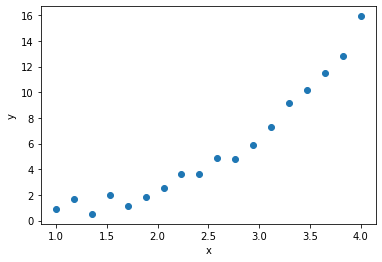

In [64]:
plt.plot(x_pow, pow_data, 'o');
plt.xlabel('x');
plt.ylabel('y');

Assume here we are using a power-law model for these data $y = C x^a$

In [67]:
# make the logarithmic transformations
y_star_pow = np.empty(npts_pow)
x_star_pow = np.empty(npts_pow)
for i in range(0, npts_pow):
    y_star_pow[i] = np.log(pow_data[i])
    x_star_pow[i] = np.log(x_pow[i])    

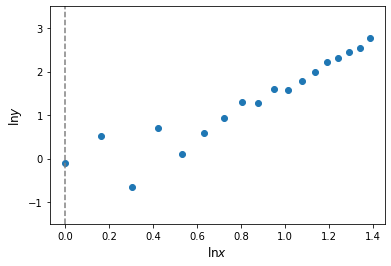

In [71]:
plt.plot(x_star_pow, y_star_pow, 'o');
plt.xlabel('$\ln x$', fontsize=12);
plt.ylabel(r'$\ln y$', fontsize=12);
plt.axvline(0,linestyle='--',color='gray');
plt.ylim([-1.5,3.5]); # adjust the y limits a bit to see the trend

### Perform the visual fit

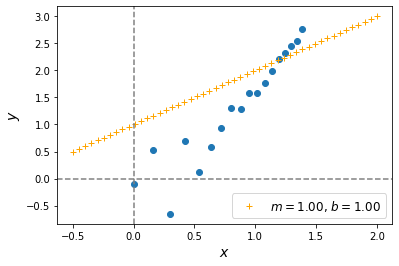

In [72]:
# for this one lets extend the x values somewhat
n_pred_pow = 50
x_star_pred_pow = np.linspace(-0.5,2, num=n_pred_pow)
visual_fit_linear(x_star_pow, y_star_pow, 1, 1, x_star_pred_pow )

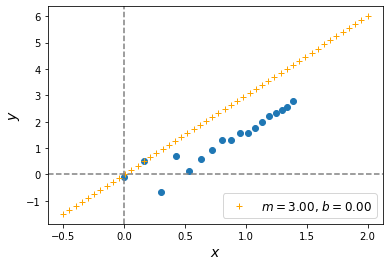

In [75]:
visual_fit_linear(x_star_pow, y_star_pow, 3, 0, x_star_pred_pow )

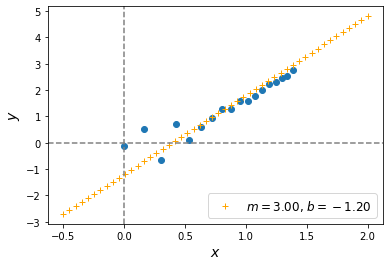

In [85]:
visual_fit_linear(x_star_pow, y_star_pow, 3, -1.2, x_star_pred_pow )

This looks decent, so let's take the slope, which is the same as $a$ to be $3$ and the intercept which is $\ln C = -1.2$ so that $C = e^{-1.2}$

In [86]:
pow_C_val = np.exp(-1.2)
print('C approximately', pow_C_val)
exp_a_val = 3

C approximately 0.30119421191220214


### Transform back to the original variables

Use the array `x_star_pow` from above to make predictions at several values of `x` for the power law model. Since `x_star_pred` is still in the log transformed variables, we have to exponentiate it to get back to the original `x` variable (see what we did with $C$ above)

In [87]:
x_pred_pow = np.exp(x_star_pred_pow) # exp works on arrays without a loop
y_pred_pow = np.empty(n_pred_pow)
for i in range(0, n_pred_pow):
    y_pred_pow[i] = pow_C_val * x_pred_pow[i]**exp_a_val

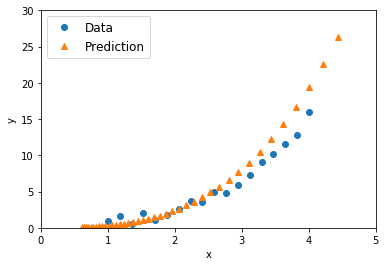

In [90]:
plt.plot(x_pow, pow_data, 'o', label='Data');
plt.plot(x_pred_pow, y_pred_pow, '^', label='Prediction');
plt.xlabel('x');
plt.ylabel('y');
plt.xlim([0,5]); # adjust these limits
plt.ylim([0,30]); # adjust these limits
plt.legend(fontsize=12);

Not too bad. Probably could be improved but this looks ok. See how small mistakes in the transformed variables become magnified by the power law

## Chebyshev's criterion for fitting

First example problem from class. Trying to determine the length of two line segments given discrepant measurements. $AB=13$, $BC=7$, $AC=19$. Same degree of confidence (i.e., error) in each measurement.

In [ ]:
x1